In [161]:

import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [164]:
display(df)

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [175]:

print("결측치 개수:", np.isnan(data).sum())

결측치 개수: 0


In [165]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [166]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


In [167]:
split = int(len(X) * 0.8)   # 80% 학습, 20% 테스트
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [168]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1345
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7035e-04
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023
Epoch 16/50
40/40 ━━━━

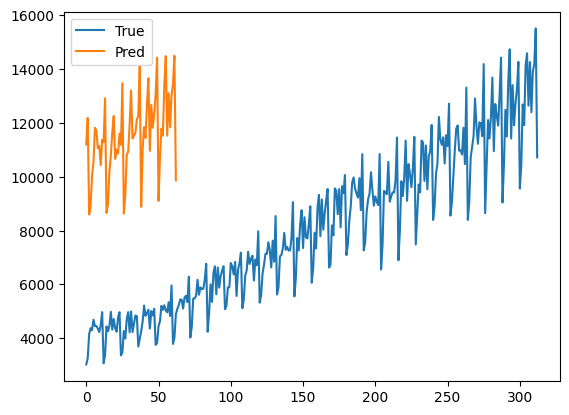

In [169]:

# 5. 예측
pred = model.predict(X_test,verbose=0)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()


In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("R² score:", r2_score(y_test, pred))


MSE: 0.0024134250690092704
MAE: 0.040085608023667896
R² score: 0.8603688721127372


In [171]:
# 4. LSTM 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # 권장 방식
model.add(LSTM(16, activation='tanh', return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16)



Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1346
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0435
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0138
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0124
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 16/20
1

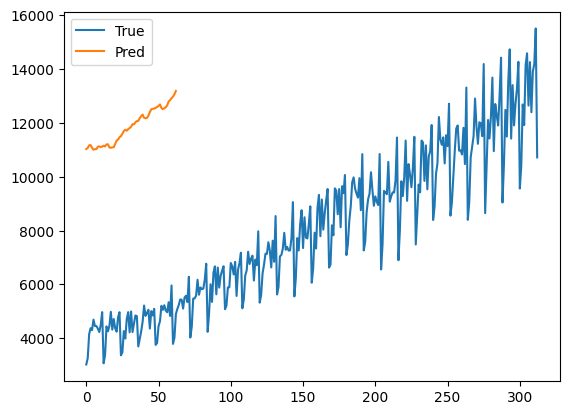

In [172]:
# 5. 예측

pred = model.predict(X_test,verbose=0)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()


In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# print로 출력

print("MSE:", mean_squared_error(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("R² score:", r2_score(y_test, pred))

MSE: 0.013745362560625005
MAE: 0.0913802989322933
R² score: 0.20474826328571127
